Lambda School Data Science

*Unit 1, Sprint 3, Module 1*

---

# STATISTICS PROBABILITY AND INFERENCE ASSIGNMENT SOLUTION

## Congressional Voting Assignment - Apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

In [0]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# Load Data
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', 
                 header=None,
                 names=['party','handicapped-infants','water-project','budget','physician-fee-freeze', 'el-salvador-aid',
                        'religious-groups','anti-satellite-ban','aid-to-contras','mx-missile','immigration',
                        'synfuels', 'education', 'right-to-sue','crime','duty-free','south-africa'])
print(df.shape)
df.head()

(435, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [0]:
# Replace '?' with np.NaN, 'n' with 0, and 'y' with 1
df = df.replace({'?':np.NaN, 'n':0, 'y':1})
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
# How many abstentions? (NaNs)
df.isnull().sum()

party                     0
handicapped-infants      12
water-project            48
budget                   11
physician-fee-freeze     11
el-salvador-aid          15
religious-groups         11
anti-satellite-ban       14
aid-to-contras           15
mx-missile               22
immigration               7
synfuels                 21
education                31
right-to-sue             25
crime                    17
duty-free                28
south-africa            104
dtype: int64

In [0]:
# Create Republicans Dataframe
rep = df[df.party == "republican"]
print(rep.shape)
rep.head()

(168, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10,republican,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0


In [0]:
# Create Democrats Dataframe
dem = df[df.party == "democrat"]
print(dem.shape)
dem.head()

(267, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0


# 1 Sample T-Tests

In a 1-sample T-test we are testing the mean of one sample against a null hypothesis of our choosing.

The null hypothesis that we designate depends on how we have encoded our data and the kind of questions that we want to test. 

If I have encoded votes as 0 for no and 1 for yes, I want to test Democratic support for an issue, and I use a null hypothesis of 0, then I am comparing Democrat voting support against a null hypothesis of no Democrat support at all for a given issue.

If I use a null hypothesis of .5 then I am comparing the democrat voting support against a null hypothesis of democrats being neither in favor or against a particular issue. 


If I use a null hypothesis of 1 then I am comparing the democrat voting support against a null hypothesis of all democrats being favor of a particular issue.

Lets use the 0 and .5 null-hypotheses to test the significance of those particular claims. They're all valid questions to be asking, they're just posing a slightly different question --testing something different.

In [0]:
# Lets test this out on the handicapped-infants issue since it's the first one.
# I am just going to omit NaN values from my tests.
# Null Hypothesis that Democratic support is 0.
stats.ttest_1samp(dem['handicapped-infants'], 0, nan_policy='omit')

Ttest_1sampResult(statistic=19.825711173357988, pvalue=1.0391992873567661e-53)

Given the results of the above test I would REJECT the null hypothesis that there is no Democrat support for the handicapped-infants bill at the 95% significance level.

In Layman's terms It would be a FALSE statment to declare that there is no democratic support for this bill. That's something that you might hear a political pundit declare, but you'll notice that they don't report their alpha value or p-value when they make such claims, they just spew them. --*Tell us how you really feel!*

In [0]:
# Null Hypothesis that Democrats neither support not oppose the issue
stats.ttest_1samp(dem['handicapped-infants'], .5, nan_policy='omit')

Ttest_1sampResult(statistic=3.431373087696574, pvalue=0.000699612317167372)

In [0]:
# Look at vote counts by party and by issue
# It's very easy to perform some Interocular Traumatic Tests (IOT) on this data
# https://www.r-bloggers.com/inter-ocular-trauma-test/
# We can eyeball the outcomes of some of these before we perform any T-tests.
# But which of the differences is statistically significant?
dem.apply(pd.Series.value_counts).T

,0.0,1.0,democrat
party,NaN,NaN,267.0
handicapped-infants,102.0,156.0,NaN
water-project,119.0,120.0,NaN
budget,29.0,231.0,NaN
physician-fee-freeze,245.0,14.0,NaN
el-salvador-aid,200.0,55.0,NaN
religious-groups,135.0,123.0,NaN
anti-satellite-ban,59.0,200.0,NaN
aid-to-contras,45.0,218.0,NaN
mx-missile,60.0,188.0,NaN


As we look at the above table we see our findings corroborated in the raw voting counts of democrats. They are definitely not all against the handicapped-infants bill hence the very high p-value. We also see that democrats on this issue are not evenly split but that there is a significant margin of support for the handicapped-infants bill. However this margin is not as extreme for our second hypothesis as for our first, and hence our secont 1-sample t-test has a lower t statistic and a higher p-value although it is still significant. 

In [0]:
# Null hypothesis that there is no democratic support for the bill.
stats.ttest_1samp(dem['physician-fee-freeze'], 0, nan_policy='omit')

Ttest_1sampResult(statistic=3.8396428405331067, pvalue=0.0001550891349511097)

We see that even though this issue has the most extreme Democrat opposition, we cannot conclude that there is no Democrat support for this issue. We will again REJECT the null hypothesis that the mean of democratic support is 0 --or that there is no Democrat support for this issue. 

In [0]:
# Null hypothesis that there is even support for the bill among democrats.
stats.ttest_1samp(dem['physician-fee-freeze'], .5, nan_policy='omit')

Ttest_1sampResult(statistic=-31.67705343439813, pvalue=6.796885728494356e-91)

Here we are again testing the null hypothesis of Democrats being neither for nor against the issue, but being split in their voting. This time we see a strong negative t-statistic and low p-value. The negative sign on this t-statistic suggests that democratic support is much further to the left of .5 (our null hypothesis of even yes/no voting in the party) in other words, this t-statistic says that not only are democrats not split on the issue, they are highly against this policy. Again this is very clear to us as we consult the output of raw vote counts for the democrats. 

As a final test and example of 1-sample T-tests lets try and get something that's not statistically significant. Lets test our split-support hypothesis on the "synfuels" policy. 

In [0]:
stats.ttest_1samp(dem['synfuels'], .5, nan_policy='omit')

Ttest_1sampResult(statistic=0.18751153526716705, pvalue=0.8514092819865365)

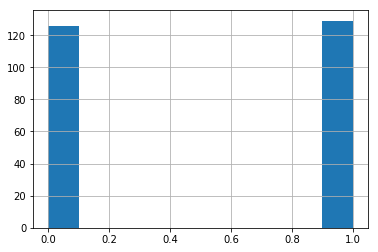

In [0]:
dem['synfuels'].hist()

Here we FAIL TO REJECT the null hypothesis that democrats voting is even on this issue because our t-statistic is small resulting in a p-value greater than .05. So we would fail to reject this null hypothesis at the 95% level. Remember that we never "accept" the null hypothesis, we only "fail to reject" it. We're not claiming that the null hypothesis is true, we're just stating that our test doesn't have enough statistical power to show otherwise.  

### We could do the same thing with the Republicans dataframe, but the result would be extremely similar.

In [0]:
# Look at republican voting patterns
rep.apply(pd.Series.value_counts).T

,0.0,1.0,republican
party,NaN,NaN,168.0
handicapped-infants,134.0,31.0,NaN
water-project,73.0,75.0,NaN
budget,142.0,22.0,NaN
physician-fee-freeze,2.0,163.0,NaN
el-salvador-aid,8.0,157.0,NaN
religious-groups,17.0,149.0,NaN
anti-satellite-ban,123.0,39.0,NaN
aid-to-contras,133.0,24.0,NaN
mx-missile,146.0,19.0,NaN


## What if we didn't split our dataframe up by Republicans and Democrats, then what would that be testing?

The contents of the overall dataframe that we're working with determines the GENERALIZABILITY of our results. If we're running tests on Democrat voting behavior then our hypothesis tests can only make claims about Democrat voting, they say nothing about Republican support or opposition for an issue, we would have to run those tests on the Republican dataframe.

But then what do T-tests on the entire dataframe of both Republicans and Democrats say? They're testing the same thing but generalized to all congresspeople and the results are not specific to one party or another. 

In [0]:
# Look at congressional voting patterns
df.apply(pd.Series.value_counts).T

,0.0,1.0,democrat,republican
party,NaN,NaN,267.0,168.0
handicapped-infants,236.0,187.0,NaN,NaN
water-project,192.0,195.0,NaN,NaN
budget,171.0,253.0,NaN,NaN
physician-fee-freeze,247.0,177.0,NaN,NaN
el-salvador-aid,208.0,212.0,NaN,NaN
religious-groups,152.0,272.0,NaN,NaN
anti-satellite-ban,182.0,239.0,NaN,NaN
aid-to-contras,178.0,242.0,NaN,NaN
mx-missile,206.0,207.0,NaN,NaN


We'll give one example of this, but it's the same as the T-tests above, just with the context being congress as a whole rather than a specific party.

In [0]:
stats.ttest_1samp(df['mx-missile'], .5, nan_policy='omit')

Ttest_1sampResult(statistic=0.049147318718299554, pvalue=0.9608257103188511)

We FAIL TO REJECT the null hypothesis that congressional support for the 'mx-missile' policy is split (even) among congresspeople. 

# 2-sample T-tests (for means)

Two-sample T-tests are very similar to 1-sample t-tests, except that instead of providing a raw value as a null hypothesis, we will be comparing the mean of a second sample as the alternate hypothesis. 

In [0]:
stats.ttest_ind(dem['mx-missile'], rep['mx-missile'], nan_policy='omit')

Ttest_indResult(statistic=16.437503268542994, pvalue=5.03079265310811e-47)

## Don't make this mistake!

Notice that a 2-sample T-test does not give the same results as a 1-sample t-test where the null hypothesis is the mean of a second sample. The test below is representative of a t-test comparing the mean of the first sample to a null-hypothesis value of .115, but it is not representative of comparing the mean of the sample to the mean of a second sample. This is because passing in the mean as a single value does not account for the variance around the mean of the second sample, so the 1-sample t-test against the mean value of another sample has a much higher t-statistic and significance than a test where you pass in the full data of both samples. 

You can avoid this mistake by making sure that you provide a raw null-hypothesis value (like 0, .5, 1) as the null-hypothesis value when performing a 1-sample t-test, and only two separate samples in their entirety to the function when performing a two-sample t-test.

In [0]:
rep_mx_missile_mean = rep['mx-missile'].mean()
print(rep_mx_missile_mean)

0.11515151515151516


In [0]:
stats.ttest_1samp(dem['mx-missile'], rep_mx_missile_mean, nan_policy='omit')

Ttest_1sampResult(statistic=23.593795768600376, pvalue=3.200954476509414e-65)

Also notice that the order in which you pass the two samples to the 2-sample test will reverse the direction of the t-statistic.

A t-statistic with a positive sign indicates that the first sample mean is higher than the second sample mean, and the significance level indicates whether or not the means are different at the 95% confidence level.

In [0]:
print(dem['mx-missile'].mean())
print(rep['mx-missile'].mean())

stats.ttest_ind(dem['mx-missile'], rep['mx-missile'], nan_policy='omit')

0.7580645161290323
0.11515151515151516


Ttest_indResult(statistic=16.437503268542994, pvalue=5.03079265310811e-47)

Here we have reversed the order of which sample we pass in first to demonstrate how `ttest_ind` might result in a negative t-statistic.


In [0]:
print(dem['mx-missile'].mean())
print(rep['mx-missile'].mean())

stats.ttest_ind(rep['mx-missile'], dem['mx-missile'], nan_policy='omit')

0.7580645161290323
0.11515151515151516


Ttest_indResult(statistic=-16.437503268542994, pvalue=5.03079265310811e-47)

Because of this, in order to ensure consistency of the signs of the t-statistic during 2-sample tests, I suggest sticking with passing in one party as the first argument and the other party as the second argument and sticking with that pattern throughout your testing so that you don't confuse yourself.

## Two-sample T-tests for Democrat Support, Republican Support, and no singnificant difference in support between parties:


## Significant Democrat Support

The outcome of this tests indicates that we should reject the null hypothesis that the mean of Democrat votes is equal to the mean of Republican votes for this issue. We would conclude due to the positive t-statistic here that Democrat support is significantly higher than republican support for this issue.

In [0]:
stats.ttest_ind(dem['synfuels'], rep['synfuels'], nan_policy='omit')

Ttest_indResult(statistic=8.293603989407588, pvalue=1.5759322301054064e-15)

## Significant Republican Support

The outcome of this tests indicates that we should reject the null hypothesis that the mean of democrat votes is equal to the mean of republican votes for this issue. We would conclude due to the positive t-statistic here that Republican support is significantly higher than Democrat support for this issue.

In [0]:
print(dem['south-africa'].mean())
print(rep['south-africa'].mean())


stats.ttest_ind(rep['south-africa'], dem['south-africa'], nan_policy='omit')

0.9351351351351351
0.6575342465753424


Ttest_indResult(statistic=-6.849454815841208, pvalue=3.652674361672226e-11)

## No Significant Difference in Support

Due to the insignificant p-value we would FAIL TO REJECT the null hypothesis that the means of Democrat support and Republican support are equal. This means that regardless of the sign on the t-statistic, we cannot make statistically significant claims about the difference between Republican and Democrat support of this issue.

In [0]:
print(dem['water-project'].mean())
print(rep['water-project'].mean())

stats.ttest_ind(dem['water-project'], rep['water-project'], nan_policy='omit')

0.502092050209205
0.5067567567567568


Ttest_indResult(statistic=-0.08896538137868286, pvalue=0.9291556823993485)

## Solution using a random sample of Democrats/Republicans

In [0]:
from scipy.stats import ttest_ind

In [0]:
def null_hypothesis_outcome(p_value):
    if p_value <= 0.05:
        return("Reject Null Hypothesis")
    else:
        return("Fail to Reject Null Hypothesis")

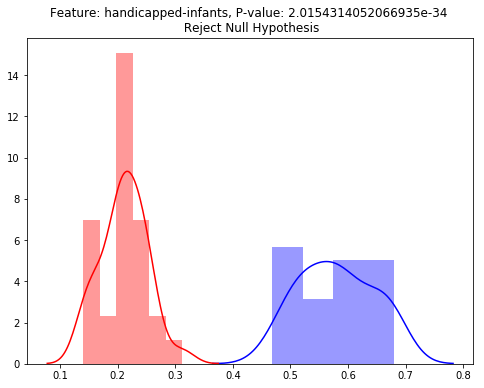

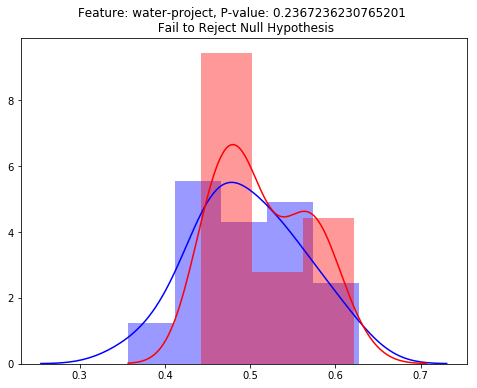

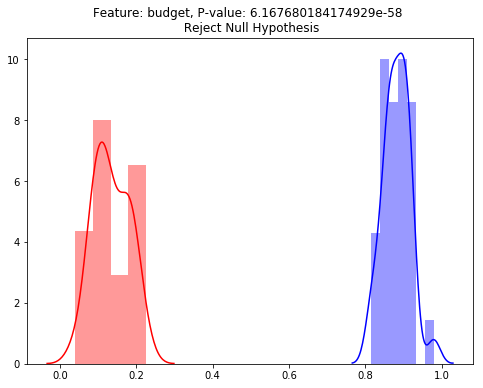

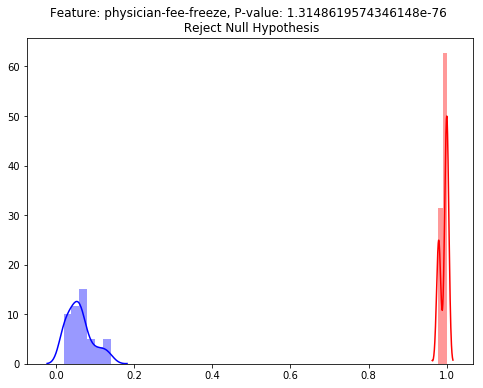

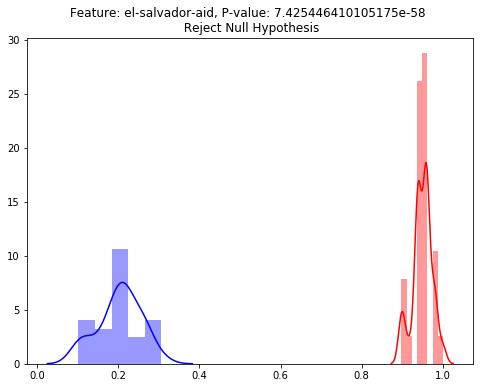

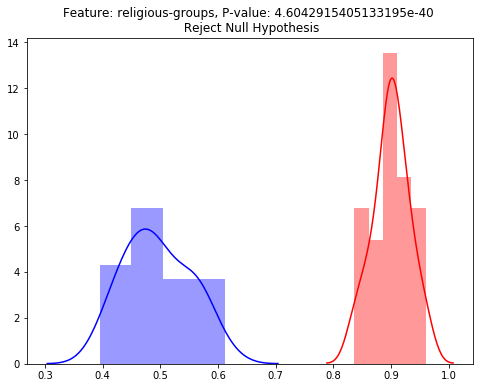

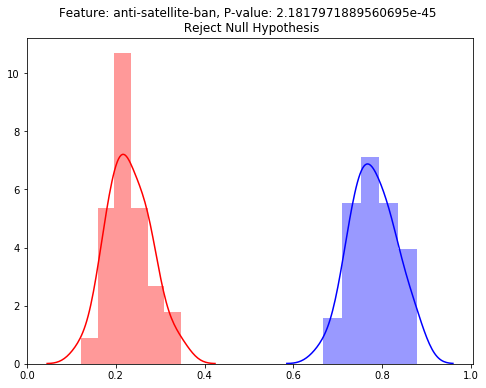

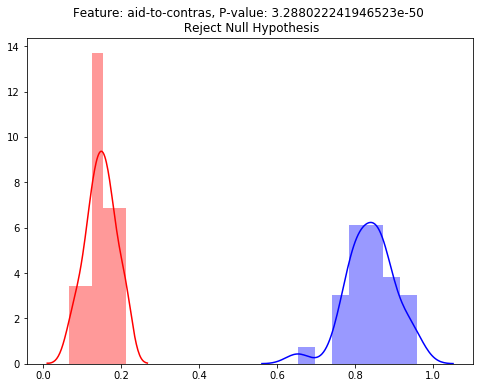

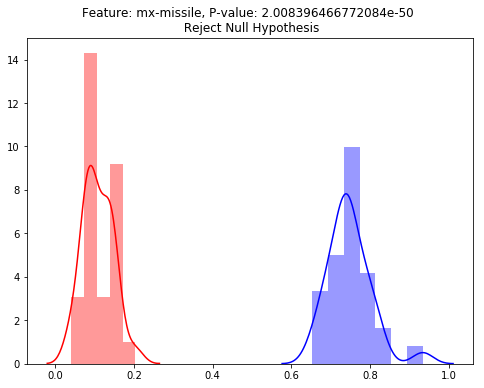

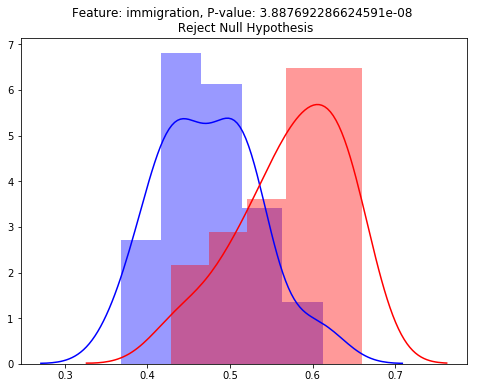

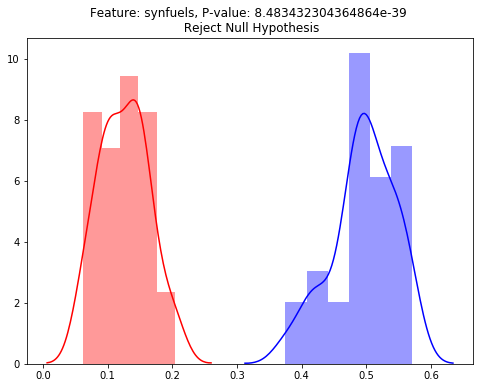

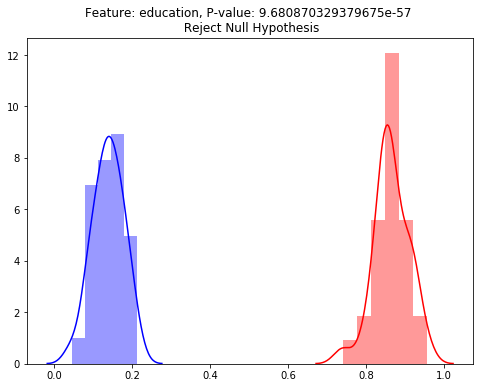

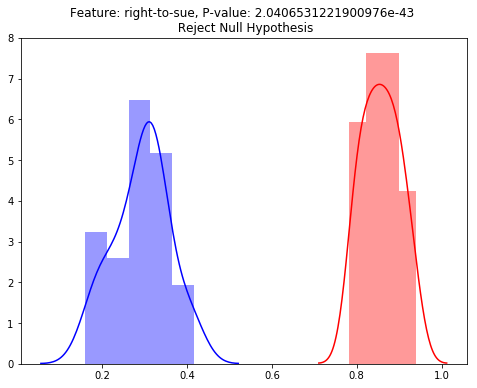

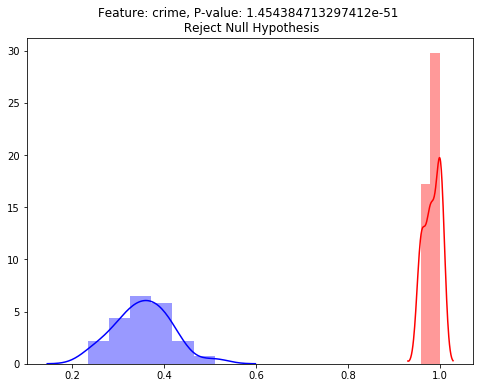

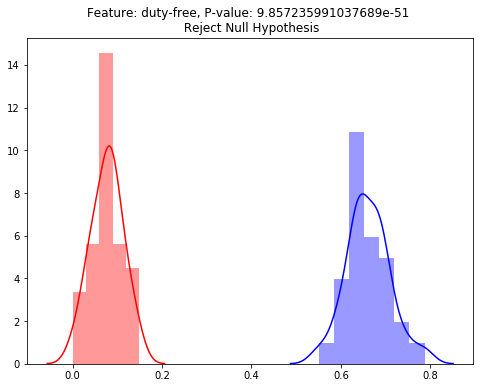

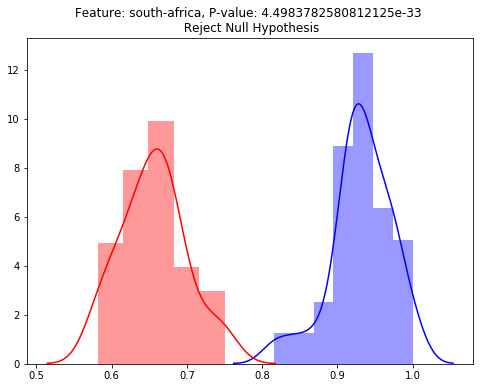

In [0]:
# Null Hypothesis: H0: µ1 = µ2 ("the two population means are equal")
# Alt Hypothesis:  H1: µ1 ≠ µ2 ("the two population means are not equal")

for col in df.columns[1:]:
    vote_percent_d = []
    vote_percent_r = []
    for i in range(30):
        # Randomly sample 50 Democrats and Republicans fo each issue
        vote_percent_d.append(dem[col].sample(50).mean())
        vote_percent_r.append(rep[col].sample(50).mean())

    # Plot Distribution
    plt.figure(figsize=(8,6))
    sns.distplot(vote_percent_d, color='b')
    sns.distplot(vote_percent_r, color='r')

    # Run t-test
    stat, pvalue = ttest_ind(vote_percent_d, vote_percent_r)
    null_hyp_outcome = null_hypothesis_outcome(pvalue)
    
    # Plot 
    plt.title(f'Feature: {col}, P-value: {pvalue} \n {null_hyp_outcome}');
    plt.show()

In [0]:
# Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
# Answer: handicapped-infants, budget, anti-satellite-ban, aid-to-contras, mx-missile, synfuels, duty-free, south-africa

In [0]:
# Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
# Answer: physician-fee-freeze, el-salvador-aid, religious-groups, immigration, education, right-to-sue, crime

In [0]:
# Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 
# (i.e. there may not be much of a difference)
# Answer: water-project